In [18]:
import torch
import matplotlib.pyplot as plt
import numpy as np
print(torch.__version__)
torch.cuda.is_available()

2.4.0+cu121


False

In [2]:
x = torch.tensor(5.0)
y = 3*x**2
print(y)

tensor(75.)


In [4]:
x = torch.tensor(5.0, requires_grad=True)
y = 3*x**2
y.backward()
print(x.grad)

tensor(30.)


In [9]:
def rosenbrock(x0, x1):
    return 100*(x1 - x0**2)**2 + (x0 - 1)**2

In [10]:
x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)

In [11]:
y = rosenbrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

tensor(-2.) tensor(400.)


In [43]:
lr = 0.001
iters = 10000

x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)
x0_hist = []
x1_hist = []

for i in range(iters):
    if i % 1000 == 0:
        print(x0.item(), x1.item())
    x0_hist.append(x0.item())
    x1_hist.append(x1.item())

    y = rosenbrock(x0, x1)
    y.backward()
    
    x0.data -= lr*x0.grad.data
    x1.data -= lr*x1.grad.data
    
    x0.grad.zero_()
    x1.grad.zero_()

print(x0.item(), x1.item())

0.0 2.0
0.6837119460105896 0.4659528136253357
0.8263181447982788 0.6820318102836609
0.8947840929031372 0.8001903295516968
0.9334872364997864 0.8711214661598206
0.9569892883300781 0.9156519174575806
0.9718162417411804 0.9443121552467346
0.9813804626464844 0.9630323052406311
0.98763507604599 0.9753732085227966
0.9917610883712769 0.983556866645813
0.9944981336593628 0.9890044331550598


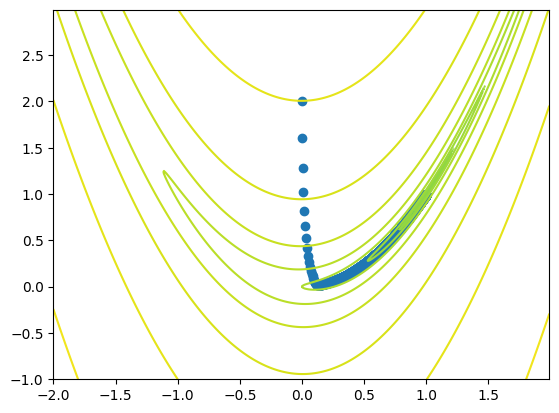

In [47]:
x = np.arange(-2, 2, 0.01)
y = np.arange(-1, 3, 0.01)
X, Y = np.meshgrid(x, y)
Z = np.log(rosenbrock(X, Y))
plt.contour(X, Y, Z, 50)
plt.scatter(np.array(x0_hist), np.array(x1_hist))


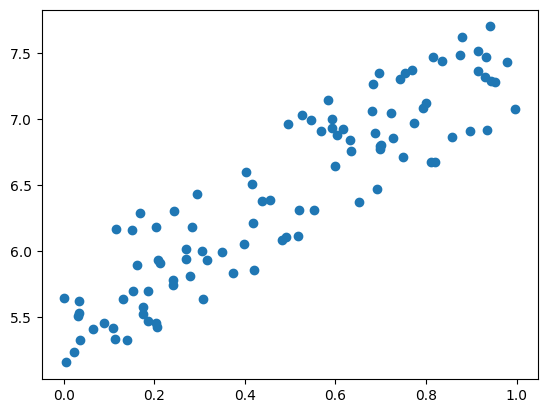

In [48]:
torch.manual_seed(0)
x = torch.rand(100, 1)
y = 2*x + 5 + torch.rand(100, 1)
plt.scatter(x, y)

In [49]:
def predict(x, W, b):
    return x @ W + b

def mse(x0, x1):
    return torch.mean((x0 - x1)**2)

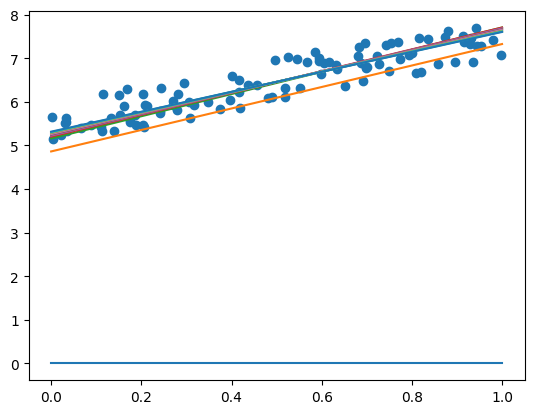

In [96]:
W = torch.zeros((1, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

iter = 109
lr = 0.1

plt.scatter(x, y)
x_plot = torch.Tensor([0, 1]).reshape(2, 1)

for i in range(iter):
    if i % 10 == 0:
        plt.plot(x_plot.detach(), predict(x_plot, W, b).detach())

    y_ = predict(x, W, b)
    err = mse(y, y_)
    err.backward()
    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data

    W.grad.zero_()
    b.grad.zero_()
    